In [1]:
# Clone your GitHub repo
!git clone https://github.com/professorAbraham/intelligent-complaint-chatbot-rag.git

# Move into the project folder
%cd intelligent-complaint-chatbot-rag


Cloning into 'intelligent-complaint-chatbot-rag'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.
/content/intelligent-complaint-chatbot-rag


In [2]:
import os

# Define the file structure as a dictionary (no top-level 'project' folder)
structure = {
    'src': {
        'main.py': None,
        'utils.py': None
    },
    'data': {
        'input.csv': None,
        'output.csv': None
    },
    'README.md': None,
    'config.json': None
}

def create_file_structure(base_path, structure):
    """
    Recursively create directories and files, writing the filename inside each file.

    Args:
        base_path (str): The base path where the structure will be created
        structure (dict): Nested dictionary representing the file structure
    """
    for name, content in structure.items():
        # Create the full path
        full_path = os.path.join(base_path, name)

        if isinstance(content, dict):
            # If it's a dictionary, create a directory and recurse
            os.makedirs(full_path, exist_ok=True)
            create_file_structure(full_path, content)
        else:
            # If it's a file, create it and write the filename inside
            with open(full_path, 'w') as f:
                f.write(name)

# Create the structure in the current working directory
base_directory = os.getcwd()  # Get current working directory in Colab
create_file_structure(base_directory, structure)

print("File structure created successfully!")

File structure created successfully!


In [3]:
!pip install pandas matplotlib seaborn nltk langchain faiss-cpu sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [12]:
!git add .
!git commit -m "initial"
!git push origin main

[main 0a04b65] initial
 2 files changed, 23 insertions(+)
 create mode 100644 requirements.txt
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 645 bytes | 645.00 KiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/ProfessorAbraham/intelligent-complaint-chatbot-rag.git
   9f3fd45..0a04b65  main -> main


In [6]:
import os

# Content for requirements.txt
requirements_content = """pandas
matplotlib
seaborn
nltk
langchain
sentence-transformers
faiss-cpu
chromadb
openai
gradio
streamlit"""

# Path for the requirements.txt file in the root directory
file_path = os.path.join(os.getcwd(), 'requirements.txt')

# Write the content to requirements.txt
with open(file_path, 'w') as f:
    f.write(requirements_content)

print("requirements.txt created successfully!")

requirements.txt created successfully!


In [7]:
import gdown
import zipfile
import os

# Step 1: Download ZIP from Google Drive
file_id = "1ymyTTYWZyG7iKglvTamhQHslH6szJy9M"
output_zip = "complaints_data.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_zip, quiet=False)

# Step 2: Unzip
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall("data")

# Step 3: Confirm extraction
print("✅ Files extracted to 'data/' directory:")
print(os.listdir("data"))


Downloading...
From (original): https://drive.google.com/uc?id=1ymyTTYWZyG7iKglvTamhQHslH6szJy9M
From (redirected): https://drive.google.com/uc?id=1ymyTTYWZyG7iKglvTamhQHslH6szJy9M&confirm=t&uuid=456431de-0ee1-4740-ba66-5f947ca8bdc1
To: /content/intelligent-complaint-chatbot-rag/complaints_data.zip
100%|██████████| 1.25G/1.25G [00:20<00:00, 59.7MB/s]


✅ Files extracted to 'data/' directory:
['output.csv', 'complaints.csv', 'input.csv']


In [8]:
# 📦 Step 1: Install required packages
!pip install pandas matplotlib seaborn nltk --quiet

In [9]:
# 📚 Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
import gdown
import zipfile
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# 📂 Step 3: Download and unzip dataset from Google Drive
file_id = "1ymyTTYWZyG7iKglvTamhQHslH6szJy9M"
output = "complaints_data.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("data")

print("✅ Files in /data:", os.listdir("data"))


Downloading...
From (original): https://drive.google.com/uc?id=1ymyTTYWZyG7iKglvTamhQHslH6szJy9M
From (redirected): https://drive.google.com/uc?id=1ymyTTYWZyG7iKglvTamhQHslH6szJy9M&confirm=t&uuid=eb3d4288-9b7b-4a02-bfa2-32f0cccad548
To: /content/intelligent-complaint-chatbot-rag/complaints_data.zip
100%|██████████| 1.25G/1.25G [00:06<00:00, 194MB/s]


✅ Files in /data: ['output.csv', 'complaints.csv', 'input.csv']


In [13]:
# Load dataset (update this if your CSV has a different name)
df = pd.read_csv('data/complaints.csv')

# Show basic info
print("Shape:", df.shape)
df.head()


/tmp/ipython-input-13-1241220671.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/complaints.csv')


Shape: (9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [15]:
# Show all column names in the CSV
print("📌 Available columns in the dataset:")
print(df.columns.tolist())


📌 Available columns in the dataset:
['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


In [16]:
# Rename for convenience
df = df.rename(columns={
    'Product': 'product',
    'Consumer complaint narrative': 'consumer_complaint_narrative'
})

# Keep only relevant columns
required_columns = ['product', 'consumer_complaint_narrative']
df = df[required_columns]


In [17]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Count complaints with/without narrative
n_with = df['consumer_complaint_narrative'].notnull().sum()
n_without = df['consumer_complaint_narrative'].isnull().sum()
print(f"✅ Complaints WITH narrative: {n_with}")
print(f"❌ Complaints WITHOUT narrative: {n_without}")


Missing values:
 product                               0
consumer_complaint_narrative    6629041
dtype: int64
✅ Complaints WITH narrative: 2980756
❌ Complaints WITHOUT narrative: 6629041


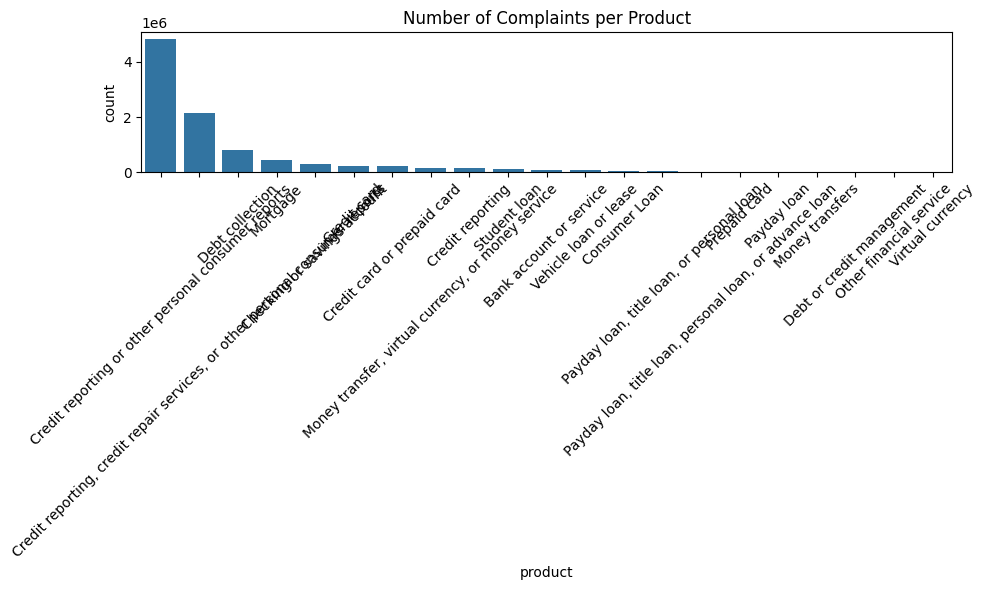

In [18]:
# Plot distribution across products
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product', order=df['product'].value_counts().index)
plt.title("Number of Complaints per Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
import nltk
nltk.download('punkt')  # 🔁 Force download punctuation tokenizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
!python -m nltk.downloader punkt


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


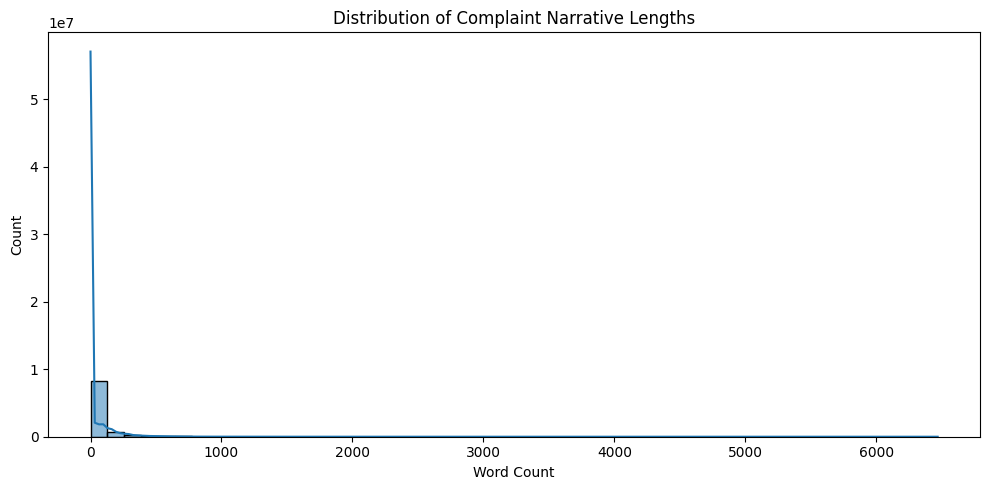

In [26]:
# Compute and plot word count
df['word_count'] = df['consumer_complaint_narrative'].fillna('').apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.tight_layout()
plt.show()


In [27]:
# Define 5 key product categories
target_products = [
    "Credit card",
    "Personal loan",
    "Buy Now, Pay Later (BNPL)",
    "Savings account",
    "Money transfer, virtual currency, or currency exchange",
    "Money transfers"
]

# Filter relevant rows
filtered_df = df[
    df['product'].isin(target_products) &
    df['consumer_complaint_narrative'].notnull()
].copy()

# Normalize product label
filtered_df['product'] = filtered_df['product'].replace({
    "Money transfer, virtual currency, or currency exchange": "Money transfers"
})


In [28]:
# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

filtered_df['cleaned_narrative'] = filtered_df['consumer_complaint_narrative'].apply(clean_text)


In [29]:
# Save to CSV
output_path = "data/filtered_complaints.csv"
filtered_df.to_csv(output_path, index=False)

print(f"✅ Cleaned dataset saved at: {output_path}")
print(f"🧮 Rows in cleaned dataset: {filtered_df.shape[0]}")


✅ Cleaned dataset saved at: data/filtered_complaints.csv
🧮 Rows in cleaned dataset: 82164
